In [121]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

In [87]:
df = pd.read_csv('E:\\Datasets\\titanic_toy.csv')

df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [88]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [89]:
x = df.drop(columns = ['Survived'])

y = df['Survived']

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [91]:
x_train.shape

(712, 3)

In [92]:
x_train['Age_mean'] = x_train.Age.mean()

x_train['Age_median'] = x_train.Age.median()

In [93]:
x_train.head()

,Age,Fare,Family,Age_mean,Age_median
30,40.0,27.7208,0,29.785904,28.75
10,4.0,16.7000,2,29.785904,28.75
873,47.0,9.0000,0,29.785904,28.75
182,9.0,31.3875,6,29.785904,28.75
876,20.0,9.8458,0,29.785904,28.75


In [94]:
x_train['Age_mean'] = x_train.Age.fillna(x_train.Age.mean())

x_train['Age_median'] = x_train.Age.fillna(x_train.Age.median())


In [95]:
print('The variance of original Data is : ',x_train.Age.var()) 

print('The variance of Age mean Data is : ',x_train.Age_mean.var())

print('The variance of Age median Data is : ',x_train.Age_median.var())

The variance of original Data is :  204.3495133904614
The variance of Age mean Data is :  161.81262452718673
The variance of Age median Data is :  161.9895663346054


<AxesSubplot:ylabel='Density'>

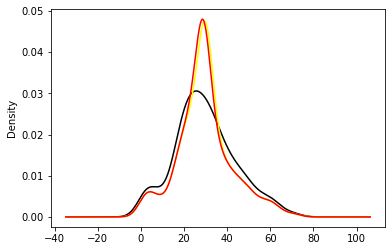

In [96]:
fig = plt.figure()

ax = fig.add_subplot(111)

x_train.Age.plot(kind='kde',color='black')

x_train.Age_mean.plot(kind='kde',color='yellow')

x_train.Age_median.plot(kind='kde',color='red')

In [99]:
x_train['Fare_mean'] = x_train.Fare.fillna(x_train.Fare.mean())

x_train['Fare_median'] = x_train.Fare.fillna(x_train.Fare.median())

In [100]:
print('The variance of original Data is : ',x_train.Fare.var()) 

print('The variance of Fare mean Data is : ',x_train.Fare_mean.var())

print('The variance of fare median Data is : ',x_train.Fare_median.var())

The variance of original Data is :  2448.197913706318
The variance of Fare mean Data is :  2324.2385256705547
The variance of fare median Data is :  2340.0910219753637


<AxesSubplot:ylabel='Density'>

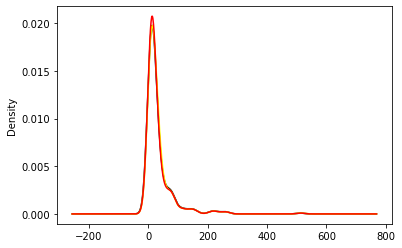

In [102]:
fig = plt.figure()

ax = fig.add_subplot(111)

x_train.Fare.plot(kind='kde',color='black')

x_train.Fare_mean.plot(kind='kde',color='yellow')

x_train.Fare_median.plot(kind='kde',color='red')

In [104]:
x_train.corr()


,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


In [106]:
x_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


<AxesSubplot:>

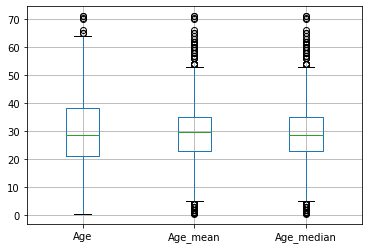

In [111]:
x_train[['Age','Age_mean','Age_median']].boxplot()

<AxesSubplot:>

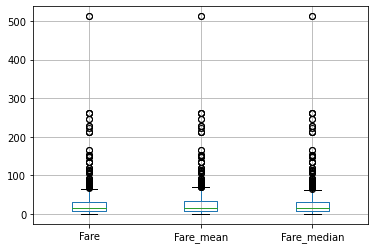

In [114]:
x_train[['Fare','Fare_mean','Fare_median']].boxplot()

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 2)

In [122]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

In [127]:
trf = ColumnTransformer([
    ('mean',mean_imputer,['Age']),
    ('median',median_imputer,['Age']),
    
    ('mean_fare',mean_imputer,['Fare']),
    ('median_fare',median_imputer,['Fare'])
],remainder = 'passthrough')

In [129]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean', SimpleImputer(), ['Age']),
                                ('median', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('mean_fare', SimpleImputer(), ['Fare']),
                                ('median_fare',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [133]:
x_train_transformed = trf.transform(x_train)

x_test_transformed = trf.transform(x_test)

In [135]:
x_train_transformed

array([[ 40.        ,  40.        ,  27.7208    ,  27.7208    ,
          0.        ],
       [  4.        ,   4.        ,  16.7       ,  16.7       ,
          2.        ],
       [ 47.        ,  47.        ,   9.        ,   9.        ,
          0.        ],
       ...,
       [ 71.        ,  71.        ,  49.5042    ,  49.5042    ,
          0.        ],
       [ 29.78590426,  28.75      , 221.7792    , 221.7792    ,
          0.        ],
       [ 29.78590426,  28.75      ,  25.925     ,  25.925     ,
          0.        ]])